In [1]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def readImg(imgName='IMG.jpg'):
    root = os.getcwd()
    imgPath = os.path.join(root, './media/image-processing/' + imgName)
    img = cv.imread(imgPath, cv.IMREAD_COLOR)
    return img


img = readImg()

In [3]:
def showImg(img):
    cv.imshow('image', img)
    cv.waitKey(0)
    cv.destroyAllWindows()

# showImg(img)

In [4]:
def writeImg(img):
    root = os.getcwd()
    outputPath = os.path.join(root, './media/image-processing/IMG_second.jpg')
    cv.imwrite(outputPath, img)

writeImg(img)

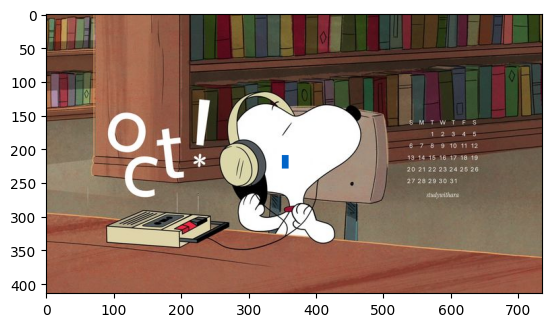

In [5]:
def readAndWritePix(img):
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # chinPix = imgRGB[210, 350]
    imgRGB[210:230, 350:360] = (0 ,100,200)

    plt.figure()
    plt.imshow(imgRGB)
    plt.show()

readAndWritePix(img)

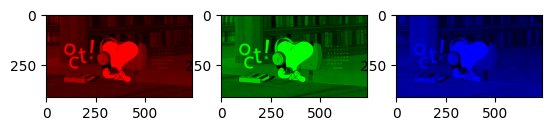

In [6]:
def bgrChannelColor(img):
    b ,g ,r = cv.split(img)

    zeros = np.zeros_like(b)

    bImg = cv.merge((b, zeros, zeros))
    gImg = cv.merge((zeros, g, zeros))
    rImg = cv.merge((zeros, zeros, r))


    plt.figure()
    plt.subplot(131)
    plt.imshow(bImg)

    plt.subplot(132)
    plt.imshow(gImg)

    plt.subplot(133)
    plt.imshow(rImg)

    plt.show()  # shows RGB IMG

bgrChannelColor(img)

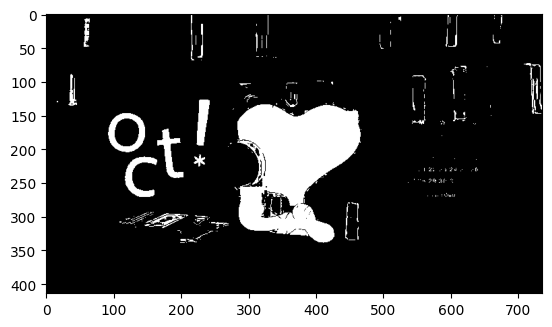

In [7]:
def HSVSegmentation(img):
    hsvImg = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    lowerbound = np.array([0,0,0])
    upperbound = np.array([360,30,255])
    mask = cv.inRange(hsvImg, lowerbound, upperbound)

    plt.figure()
    plt.imshow(mask, cmap='gray')
    plt.show()

HSVSegmentation(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


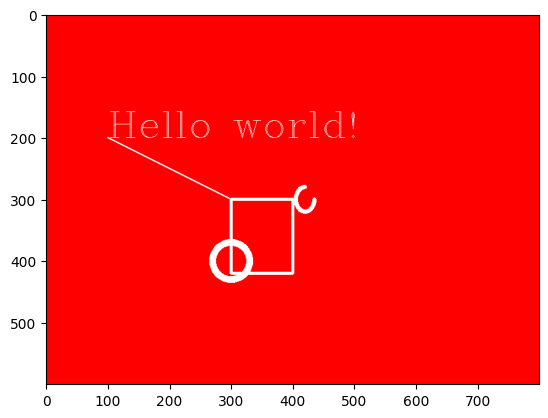

In [8]:
def drawingOnImg():
    # create blue image
    zeros = np.zeros([600, 800])
    ones = np.ones([600, 800])
    bimg = cv.merge((ones, zeros, zeros))

    # draw on image
    whiteColor = (255,255,255)
    cv.line(bimg, (100,200), (300,300), whiteColor,2)
    
    cv.rectangle(bimg, (300,300), (400,420), whiteColor, 3)

    cv.circle(bimg, (300, 400), 30, whiteColor, 10)
    
    cv.ellipse(bimg,(420, 300),(15,20), 0, 0, 270, whiteColor, 6)

    cv.putText(bimg, 'Hello world!', (100, 200), cv.FONT_HERSHEY_COMPLEX, 2, whiteColor)
    
    plt.figure()
    plt.imshow(bimg)
    plt.show()

    # for Real color Run this:
    # showImg(bimg)

drawingOnImg()

In [9]:
# def trackbarCallback():
#     pass

# def trackbar(img):
#     windowName = 'Trackbar Demo'
#     cv.namedWindow(windowName)
#     cv.createTrackbar('Blue', windowName, 0, 255, trackbarCallback )
#     cv.createTrackbar('Green', windowName, 0, 255, trackbarCallback )
#     cv.createTrackbar('Red', windowName, 0, 255, trackbarCallback )

#     while True:
#         cv.imshow(windowName, img)

#         if cv.waitKey(1) == ord('q'):
#             break

#         b = cv.getTrackbarPos('Blue', windowName)
#         g = cv.getTrackbarPos('Green', windowName)
#         r = cv.getTrackbarPos('Red', windowName)

#         cv.circle(img, (100,100), 5, (b, g, r), 2)

#     cv.destroyAllWindows()


# trackbar(img)

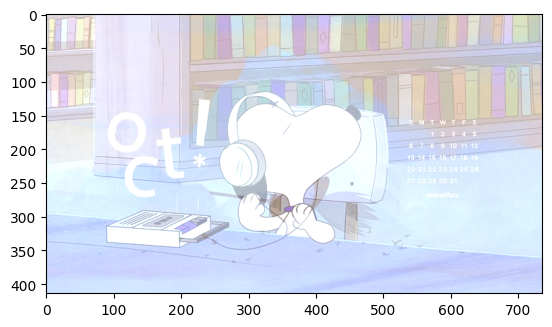

In [10]:
def blendImages(img1, img2):
   alpha = 0.6
   beta = 1 - alpha
   gamma = 100
   imgBlend = cv.addWeighted(img1,alpha, img2, beta, gamma)

   plt.figure()
   plt.imshow(imgBlend)
   plt.show()

img1 = readImg()
img2 = readImg('IMG2.jpg')

# print(img1.shape)
# print(img2.shape)

img2 = img2[:414]

blendImages(img1, img2)

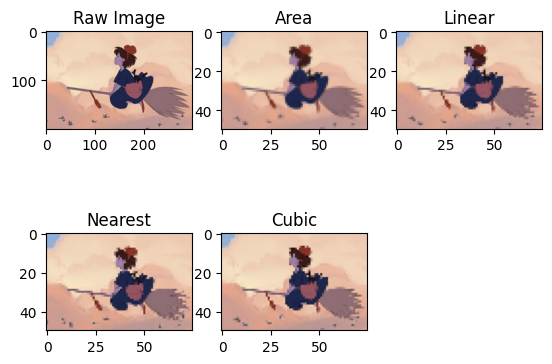

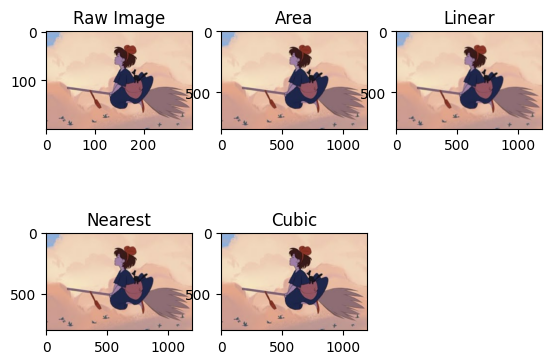

In [11]:
def resizeImg(img, scale = 1/4):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    h, w, _ = img.shape

    interpMethods = [
        cv.INTER_AREA,
        cv.INTER_LINEAR,
        cv.INTER_NEAREST,
        cv.INTER_CUBIC
    ]

    interpTitle = ['Area', 'Linear', 'Nearest', 'Cubic']

    plt.figure()
    plt.subplot(2,3,1)
    plt.imshow(img)
    plt.title('Raw Image')

    for i in range(len(interpMethods)):
        plt.subplot(2,3,i+2)
        imgResized = cv.resize(img, (int(w*scale), int(h*scale)),interpolation=interpMethods[i])

        plt.imshow(imgResized)
        plt.title(interpTitle[i])

    plt.show()

    # return last resized image
    return imgResized

testImg = img2[150:350, 200:500]
resizedImg1 = resizeImg(testImg, scale=1/4)
resizedImg2 = resizeImg(testImg, scale=4)


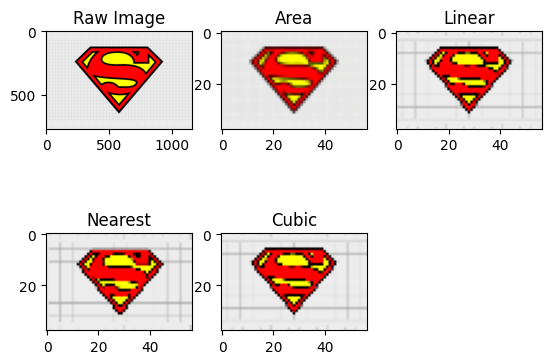

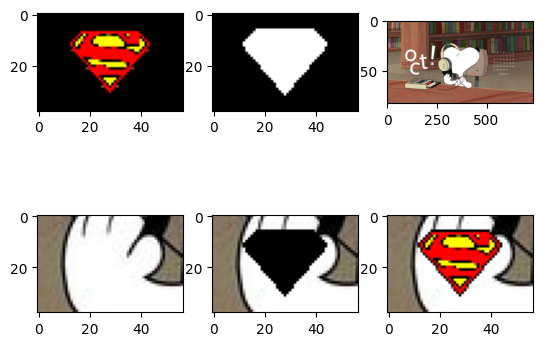

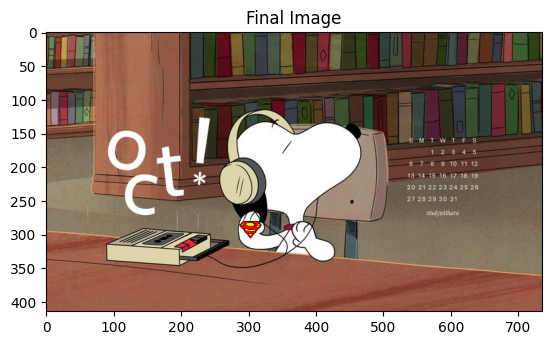

In [12]:
def overlayImg(img1, img2):
    topImg = resizeImg(img2, scale=1/20)
    th, tw, _ = topImg.shape

    lowerbound = np.array([150,150,150])
    upperbound = np.array([255,255,255])

    topImgMask = cv.inRange(topImg, lowerbound, upperbound)
    # realMask = np.ones_like(topImgMask)
    # realMask = topImgMask - realMask
    realMask = cv.bitwise_not(topImgMask)
    
    plt.figure()
    plt.subplot(231)
    topImgMasked = cv.bitwise_and(topImg, topImg, mask=realMask)
    plt.imshow(topImgMasked)

    plt.subplot(232)
    plt.imshow(realMask, cmap='gray')

    plt.subplot(233)
    plt.imshow(img1)

    imgRegion = img1[275:275+th, 275:275+tw, :]
    plt.subplot(234)
    plt.imshow(imgRegion)

    imgRegionBlack = cv.bitwise_and(imgRegion, imgRegion, mask=topImgMask)
    plt.subplot(235)
    plt.imshow(imgRegionBlack)

    # imgRegionOverlay = cv.bitwise_or(imgRegionBlack, topImgMasked)
    imgRegionOverlay = cv.add(imgRegionBlack, topImgMasked)
    plt.subplot(236)
    plt.imshow(imgRegionOverlay)

    plt.figure()
    finalImg = img1
    finalImg[275:275+th, 275:275+tw] = imgRegionOverlay
    plt.imshow(finalImg)
    plt.title('Final Image')



logo = readImg('Superman-Logo.png')
img1rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
overlayImg(img1rgb, logo)

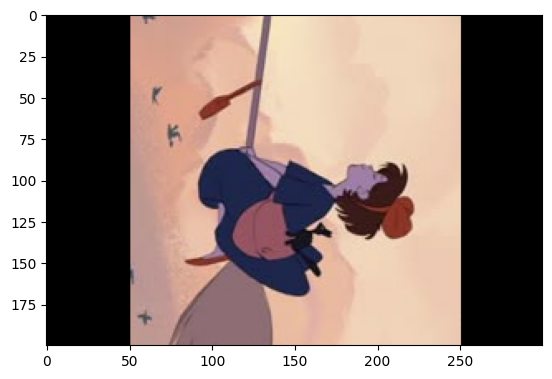

In [13]:
def rotationTrans(img):
    h, w, _ = img.shape
    T = cv.getRotationMatrix2D((int(w/2), int(h/2)), -90, 1)
    imgTrans = cv.warpAffine(img, T, (w, h))

    plt.figure()
    plt.imshow(imgTrans)
    plt.show()

img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
testImg = img2[150:350, 200:500]
rotationTrans(testImg)

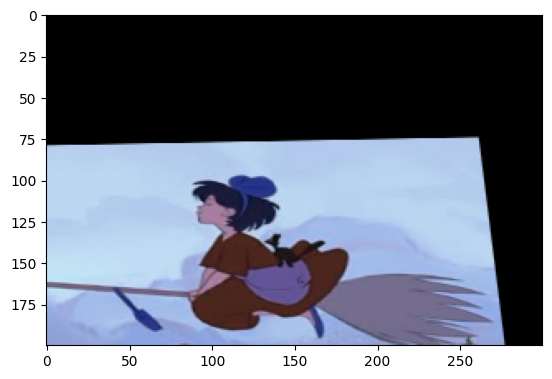

In [14]:
def affineTrans(img):
    h, w, _ = img.shape

    # need 3 points
    p1 = np.array([[100,100],
                  [450,250],
                  [320,400]], dtype=np.float32
                  )
    
    p2 = np.array([[50,150],
                  [450,250],
                  [320,360]], dtype=np.float32
                  ) 
    T = cv.getAffineTransform(p1, p2)
    imgTrans = cv.warpAffine(img, T, (w, h))

    plt.figure()
    plt.imshow(imgTrans)
    plt.show()

img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
testImg = img2[150:350, 200:500]
affineTrans(testImg)

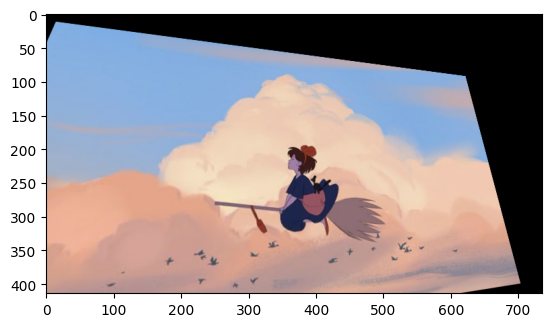

In [15]:
def perpectiveTrans(img):
    h, w, _ = img.shape

    # need 4 points
    p1 = np.array([[100,100],
                  [450,250],
                  [320,400],
                  [20,30]], dtype=np.float32
                  )
    
    p2 = np.array([[110,110],
                  [460,260],
                  [330,440],
                  [30,40]], dtype=np.float32
                  ) 
    T = cv.getPerspectiveTransform(p1, p2)
    imgTrans = cv.warpPerspective(img, T, (w, h))

    plt.figure()
    plt.imshow(imgTrans)
    plt.show()

    return imgTrans

img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

temp = perpectiveTrans(img2)

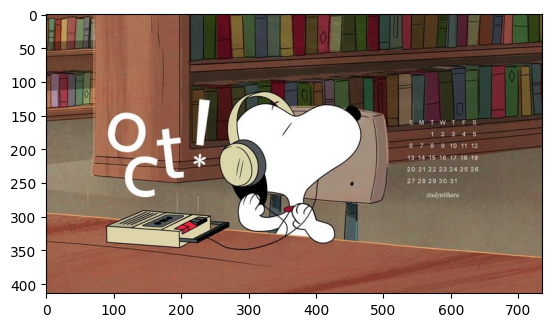

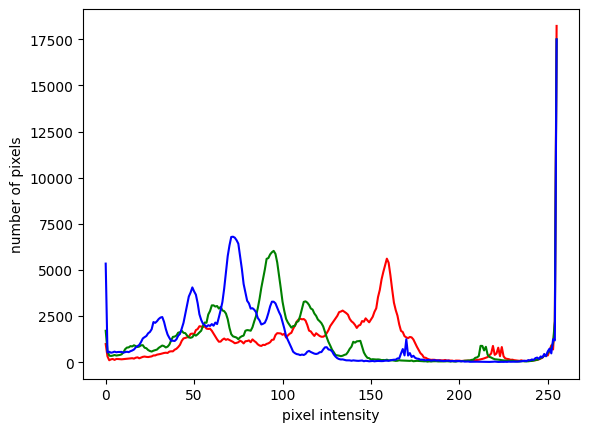

In [16]:
def getHistogram(img):
    colors = ['r', 'g', 'b']

    plt.figure()
    for i in range(len(colors)):
        hist = cv.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, colors[i])

    plt.xlabel('pixel intensity')
    plt.ylabel('number of pixels')
    plt.show()

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img1)
plt.show()

getHistogram(img1)

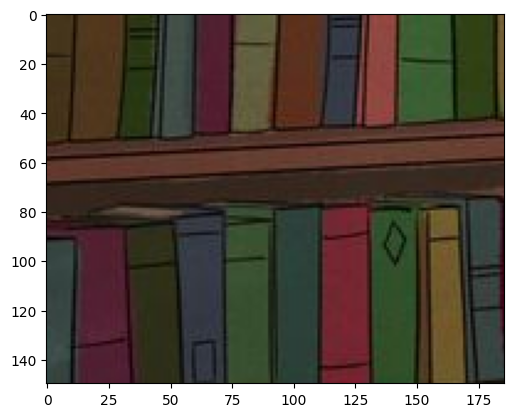

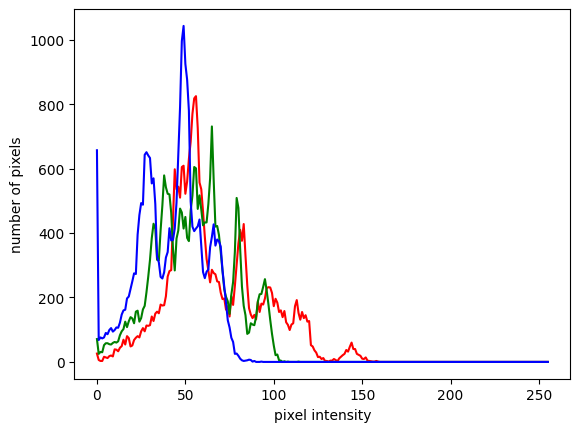

In [17]:
# img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img1[:150,550:])
plt.show()
getHistogram(img1[:150,550:])

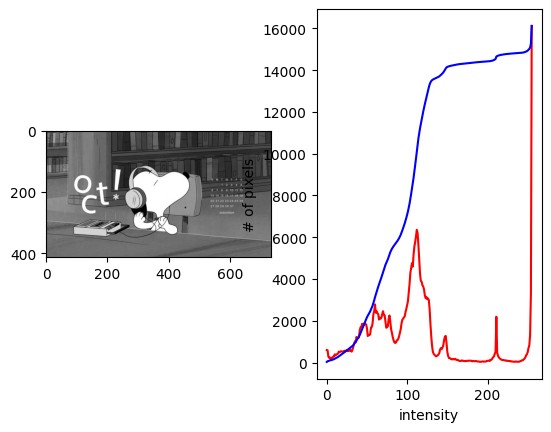

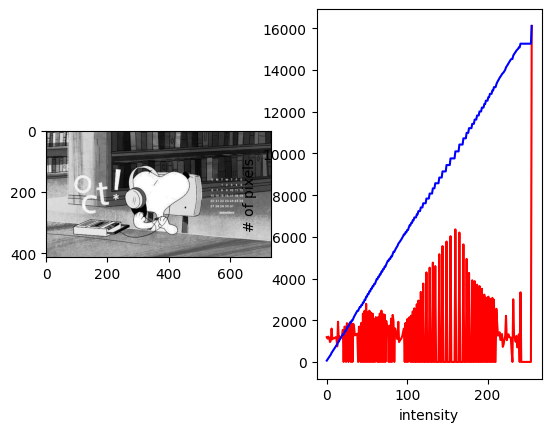

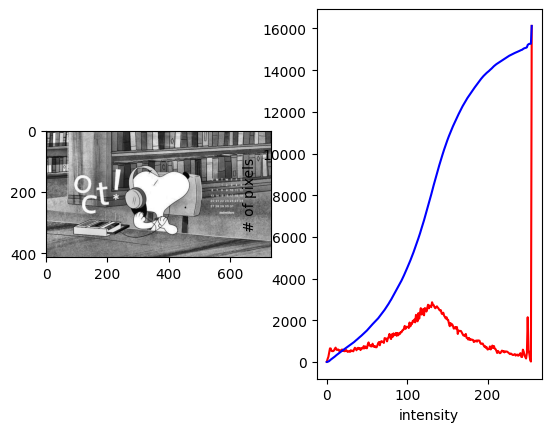

In [18]:
def plotCDFHistogram(img):
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    cdf = hist.cumsum()
    cdfNorm = cdf * float(hist.max()) / cdf.max()

    plt.figure()
    plt.subplot(121)
    plt.imshow(img, cmap='gray')

    plt.subplot(122)
    plt.plot(hist, color='red')

    plt.plot(cdfNorm, color='blue')
    plt.xlabel('intensity')
    plt.ylabel('# of pixels')

    plt.show()

grayImg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Plot of gray image
plotCDFHistogram(grayImg)

# Plot of Equal gray image
equImg = cv.equalizeHist(grayImg)
plotCDFHistogram(equImg)

# plot of Clahe gray image
claheObj = cv.createCLAHE(clipLimit=5, tileGridSize=(8,8))
claheImg = claheObj.apply(grayImg)
plotCDFHistogram(claheImg)

In [19]:
def addNoise(img, noiseProb = 0.05):
    noise = np.random.rand(img.shape[0], img.shape[1])
    noisyImg = img.copy()
    noisyImg[noise < noiseProb/2] = 0
    noisyImg[noise > 1 - noiseProb/2] = 255

    return noisyImg

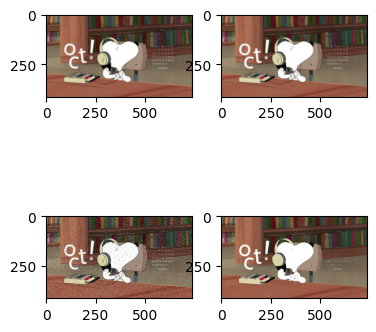

In [20]:
def conv2d(img, n=5):
    kernel = np.ones((n,n), np.float32) / (n*n)
    imgFilter = cv.filter2D(img, -1, kernel)

    return imgFilter

def blurImg(img, n=5):
    imgFilter = cv.blur(img, (n,n))

    return imgFilter

def medianFilter(img, n=5):
    imgFilter = cv.medianBlur(img, n)
    return imgFilter

def filterImg(img):
    convImg = conv2d(img1)
    bImg = blurImg(img1)

    noisyImg = addNoise(img)
    medianImg = medianFilter(noisyImg)

    plt.figure()

    plt.subplot(231)
    plt.imshow(convImg)

    plt.subplot(232)
    plt.imshow(bImg)

    plt.subplot(234)
    plt.imshow(noisyImg)

    plt.subplot(235)
    plt.imshow(medianImg)

    plt.show()

filterImg(img1)

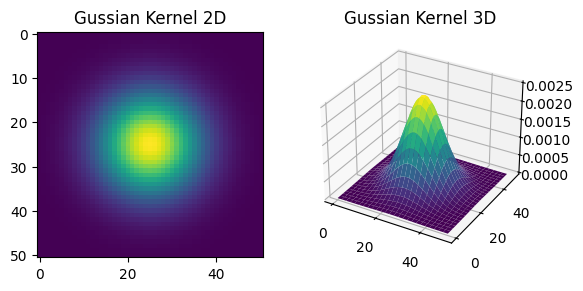

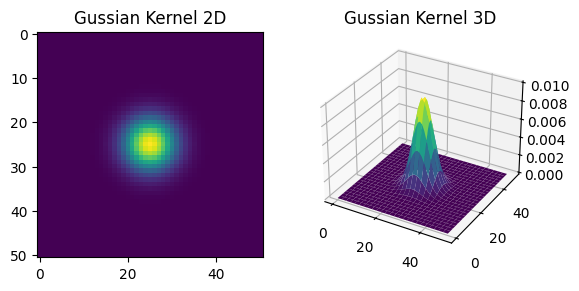

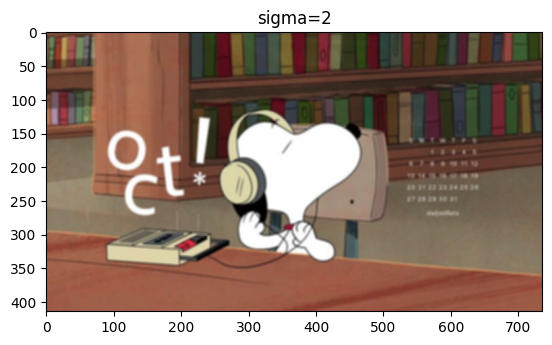

In [21]:
def getGussFilter(n=51, sigma=8):
    kernel = cv.getGaussianKernel(n, sigma)
    kernel = np.outer(kernel, kernel)

    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(kernel)
    plt.title('Gussian Kernel 2D')

    ax = fig.add_subplot(122, projection='3d')
    x = np.arange(0,n,1)
    y = np.arange(0,n,1)
    X,Y = np.meshgrid(x,y)
    ax.plot_surface(X, Y, kernel, cmap='viridis')
    plt.title('Gussian Kernel 3D')

    plt.show()

def gussFilter(img, n=51, sigma=8):
    imgFilter = cv.GaussianBlur(img, (n,n), sigma)

    plt.figure()
    plt.imshow(imgFilter)
    plt.title('sigma='+str(sigma))
    plt.show()

getGussFilter(sigma=8)
getGussFilter(sigma=4)

gussFilter(img1, n=5, sigma=2)



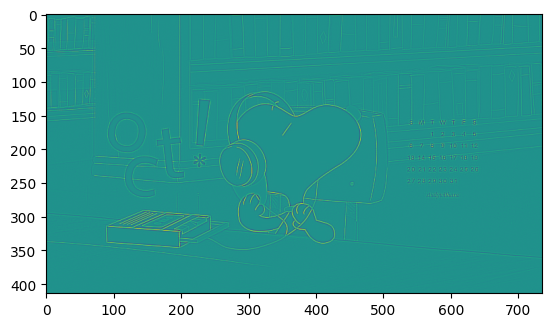

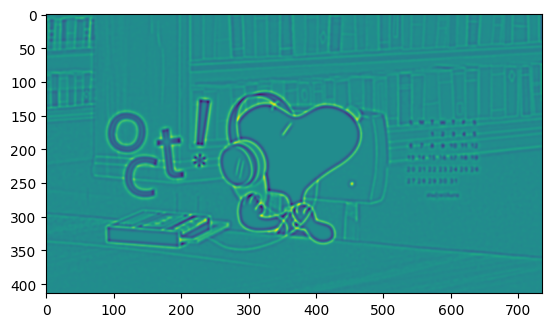

In [22]:
def imgGradient(img, ksize=3):
    laplacian = cv.Laplacian(img, cv.CV_64F, ksize=ksize)
    
    plt.figure()
    plt.imshow(laplacian)
    plt.show()


imgGray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
imgGradient(imgGray,3)
imgGradient(imgGray,21)

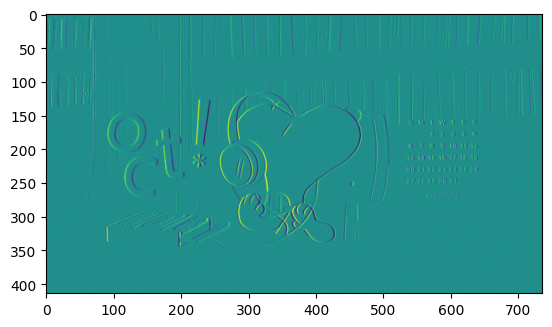

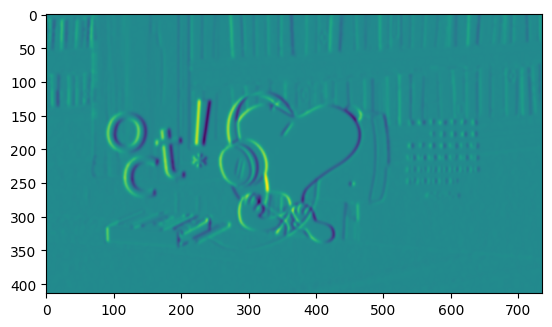

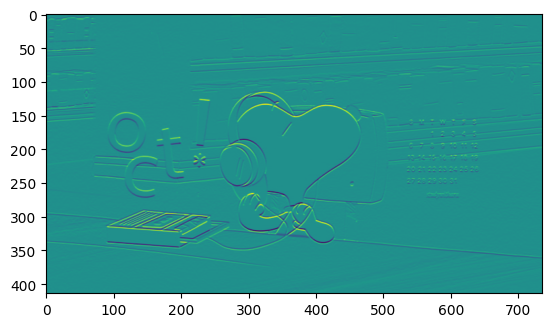

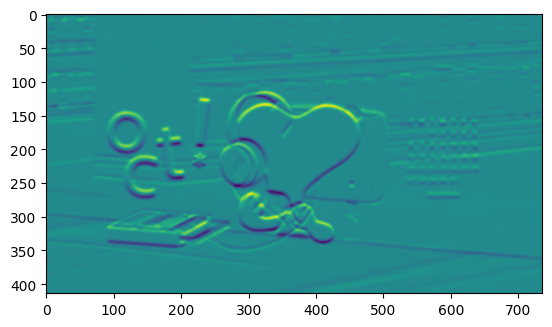

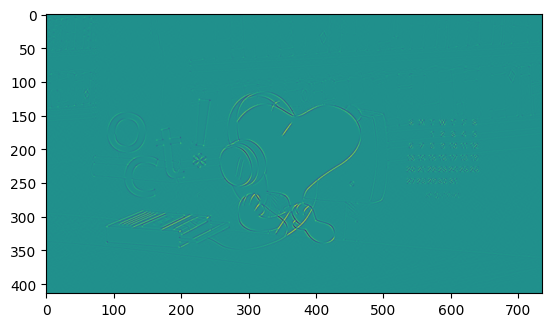

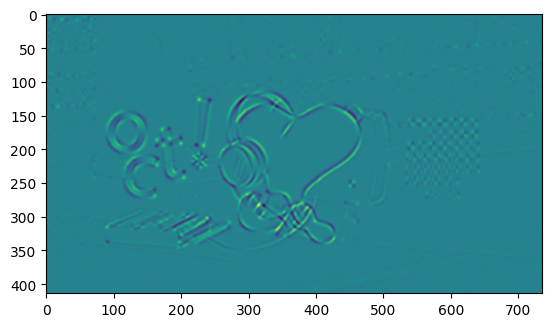

In [23]:
def imgGradient(img, kx=1, ky=1, ksize=3):
    # check sobel kernel
    # kx, ky = cv.getDerivKernels(kx,ky,ksize)
    # print(kx@ky.T)

    sobelX = cv.Sobel(img, cv.CV_64F, dx=kx, dy=ky, ksize=ksize)
    
    plt.figure()
    plt.imshow(sobelX)
    plt.show()
    


imgGray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

imgGradient(imgGray,1,0,3)
imgGradient(imgGray,1,0,21)

imgGradient(imgGray,0,1,3)
imgGradient(imgGray,0,1,21)

imgGradient(imgGray,1,1,3)
imgGradient(imgGray,1,1,21)

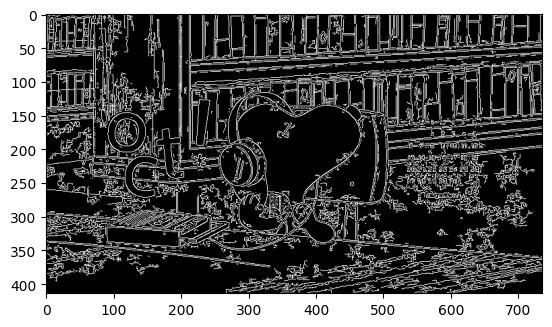

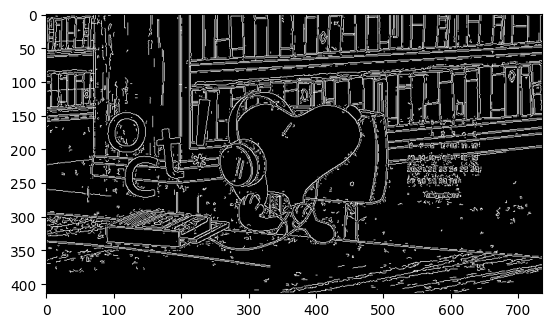

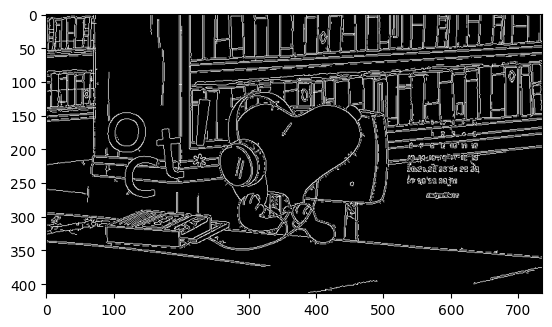

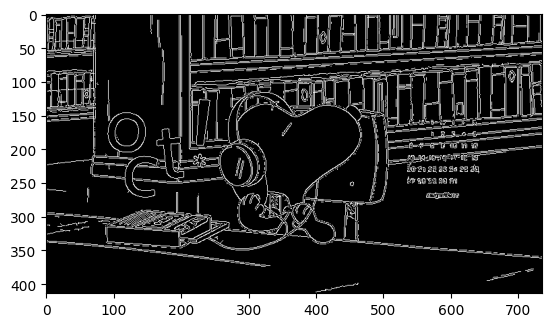

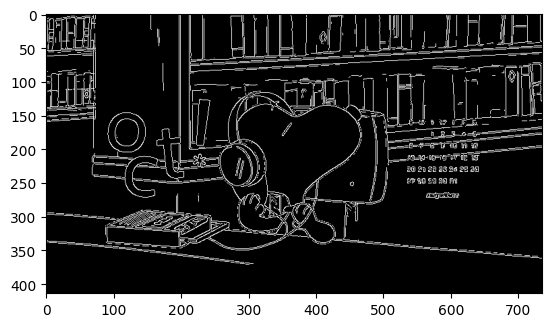

In [24]:
def cannyEdge(img, minth=100, maxth=180):
    cannyImg = cv.Canny(img, minth, maxth)
    
    plt.figure()
    plt.imshow(cannyImg, cmap='gray')
    plt.show()


imgGray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
cannyEdge(imgGray, minth=10, maxth=50)
cannyEdge(imgGray, minth=30, maxth=50)
cannyEdge(imgGray, minth=30, maxth=100)
cannyEdge(imgGray, minth=50, maxth=100)
cannyEdge(imgGray, minth=150, maxth=200)



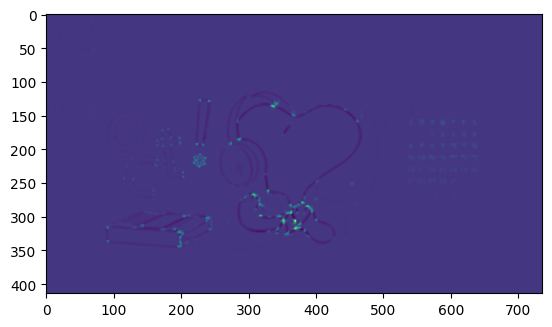

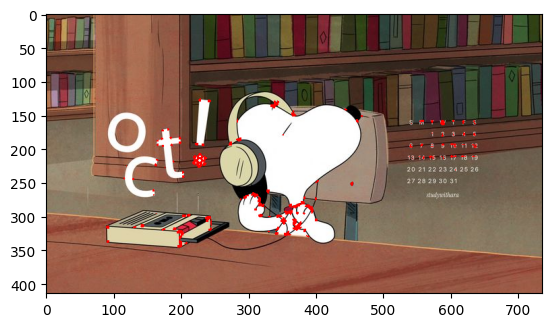

In [25]:
def harrisCorner(img, k=0.04, blocksize=5, sobelsize=3):
    harris = cv.cornerHarris(img, blocksize, sobelsize, k)
    
    plt.figure()
    plt.imshow(harris)
    plt.show()
    return harris

imgGray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
harris = harrisCorner(imgGray)

# harrisCorner(imgGray, k=0.01)
# harrisCorner(imgGray, k=0.1)

# harrisCorner(imgGray, blocksize=3, sobelsize=3)
# harrisCorner(imgGray, blocksize=5, sobelsize=3)

testImg = img1.copy()
testImg[harris>0.05*harris.max()] = [255,0,0]
plt.figure()
plt.imshow(testImg)
plt.show()



(100, 1, 2)


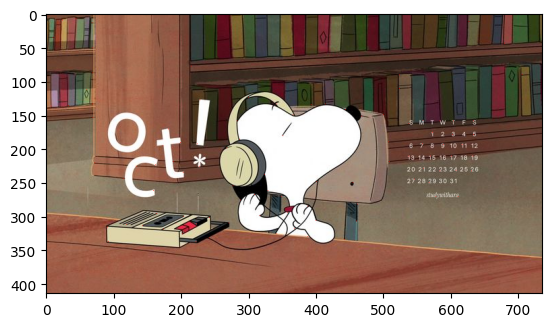

In [26]:
def imgGoodCorner(img, maxCorner=100, quality=0.01, minDist=20):
    corners = cv.goodFeaturesToTrack(img, maxCorner, quality, minDist)
    return corners

imgGray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
corners = imgGoodCorner(imgGray)
print(corners.shape)

testImg = img1.copy()
for corner in corners:
            x, y = corner.ravel().astype(int)
            testImg[y, x] = [255, 0, 0] 

# zoom to see corners!
plt.figure()
plt.imshow(testImg)
plt.show()

# of keypoints:  527


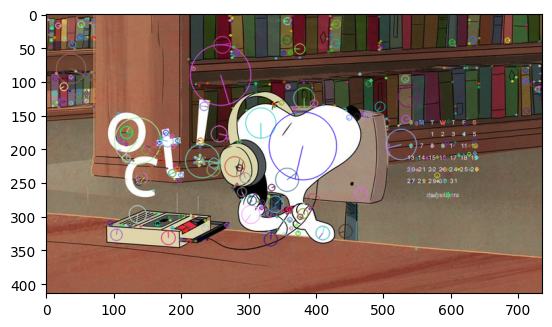

In [27]:
def getSiftImg(img):
    testimg = img.copy()
    sift = cv.SIFT_create()
    keypoints, _ = sift.detectAndCompute(testimg, None)
    siftImg = cv.drawKeypoints(testimg, keypoints, testimg, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    print('# of keypoints: ',_.shape[0])

    plt.figure()
    plt.imshow(siftImg)
    plt.show()

getSiftImg(img1)


# of keypoints:  500


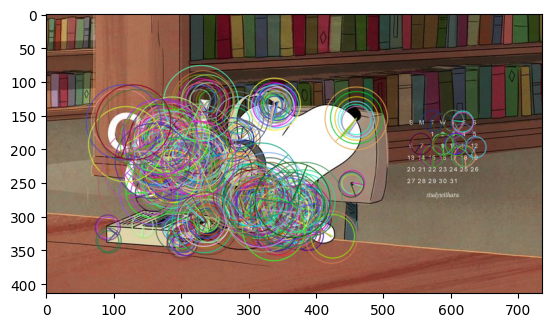

In [28]:
def getORBImg(img):
    testimg = img.copy()
    orb = cv.ORB_create()
    keypoints, _ = orb.detectAndCompute(testimg, None)
    orbImg = cv.drawKeypoints(testimg, keypoints, testimg, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    print('# of keypoints: ',_.shape[0])

    plt.figure()
    plt.imshow(orbImg)
    plt.show()

getORBImg(img1)


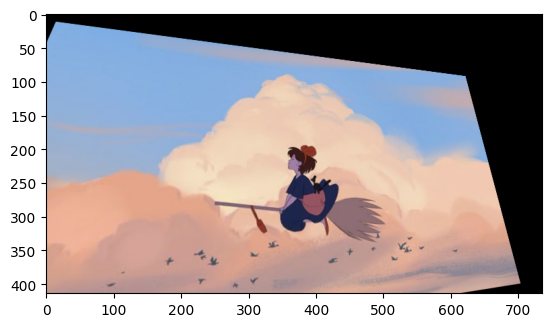

# of keypoints:  500


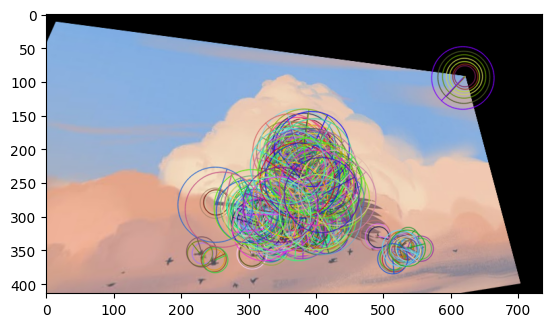

In [29]:
imgTransformed = perpectiveTrans(img2.copy())

getORBImg
getORBImg(imgTransformed)


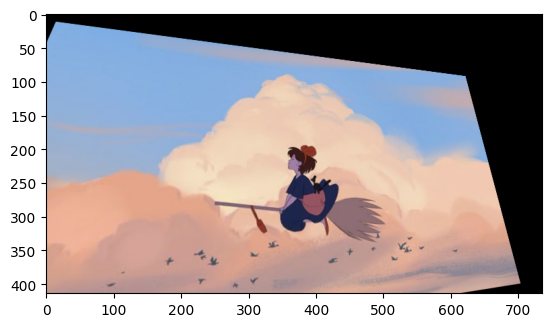

In [30]:
plt.figure()
plt.imshow(imgTransformed)
plt.show()

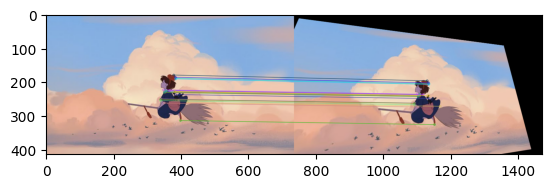

In [31]:
def getORBPoints(img):

    orb = cv.ORB_create()
    keypoints, descriptor = orb.detectAndCompute(img, None)

    return keypoints, descriptor

def bruteForce(orbimg1, orbimg2, nmatches=20):
    keypoints1, descriptor1 = getORBPoints(orbimg1)
    keypoints2, descriptor2 = getORBPoints(orbimg2)

    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

    matches = bf.match(descriptor1, descriptor2)
    matches = sorted(matches, key=lambda x:x.distance)

    imgMatch = cv.drawMatches(orbimg1, keypoints1, orbimg2, keypoints2, matches[:nmatches], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return imgMatch

imgMatch = bruteForce(img2, imgTransformed)
plt.figure()
plt.imshow(imgMatch)
plt.show()

